<a href="https://colab.research.google.com/github/halepino/dsc650/blob/master/dsc650/assignments/assignment05/Assignment5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Holly Figueroa
###DSC650 Week 5  

**Book Exercise 3.5**  
A Single-Label, Multiclass Classification Problem

In [ ]:
# Loading dataset
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

len(train_data)
len(test_data)

2246

In [ ]:
# How to decode newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire= ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
# Encoding the data
# Encode the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print( x_train.shape, x_test.shape)

(8982, 10000) (2246, 10000)


In [ ]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# Model Definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


In [ ]:
# Compileing the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting asside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 6s 221ms/step - loss: 2.8246 - accuracy: 0.4868 - val_loss: 1.9326 - val_accuracy: 0.6130
Epoch 2/20
16/16 [==============================] - 2s 154ms/step - loss: 1.6302 - accuracy: 0.6586 - val_loss: 1.4385 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 2s 115ms/step - loss: 1.2545 - accuracy: 0.7294 - val_loss: 1.2267 - val_accuracy: 0.7150
Epoch 4/20
16/16 [==============================] - 2s 134ms/step - loss: 1.0213 - accuracy: 0.7799 - val_loss: 1.1046 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 2s 109ms/step - loss: 0.8558 - accuracy: 0.8131 - val_loss: 1.0178 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 2s 110ms/step - loss: 0.7185 - accuracy: 0.8447 - val_loss: 0.9768 - val_accuracy: 0.7780
Epoch 7/20
16/16 [==============================] - 1s 65ms/step - loss: 0.5999 - accuracy: 0.8735 - val_loss: 0.9238 - val_accuracy: 0.8160
Epoch 8

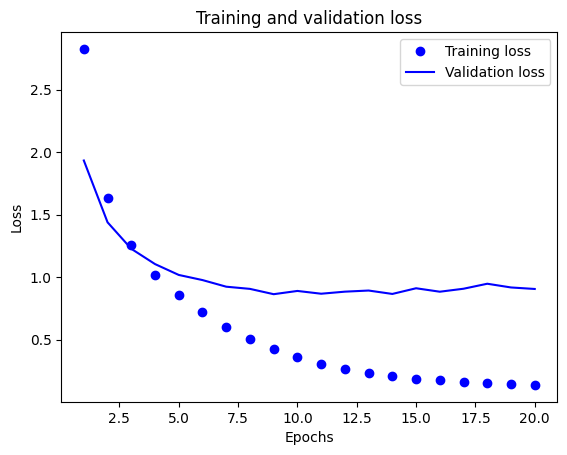

In [ ]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


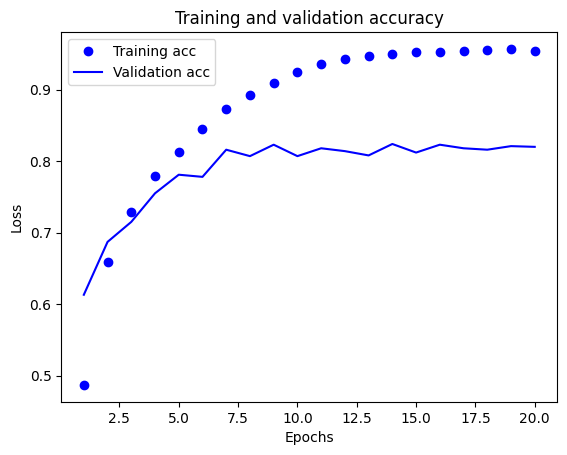

In [ ]:
# Plotting the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Retraining the model
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

# Compile
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))
# Results
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 3s 160ms/step - loss: 2.7270 - accuracy: 0.4594 - val_loss: 1.8155 - val_accuracy: 0.6140
Epoch 2/9
16/16 [==============================] - 2s 102ms/step - loss: 1.5429 - accuracy: 0.6809 - val_loss: 1.3605 - val_accuracy: 0.6950
Epoch 3/9
16/16 [==============================] - 2s 100ms/step - loss: 1.1778 - accuracy: 0.7404 - val_loss: 1.1816 - val_accuracy: 0.7340
Epoch 4/9
16/16 [==============================] - 2s 106ms/step - loss: 0.9517 - accuracy: 0.7949 - val_loss: 1.0644 - val_accuracy: 0.7630
Epoch 5/9
16/16 [==============================] - 2s 100ms/step - loss: 0.7848 - accuracy: 0.8304 - val_loss: 1.0174 - val_accuracy: 0.7730
Epoch 6/9
16/16 [==============================] - 2s 96ms/step - loss: 0.6540 - accuracy: 0.8612 - val_loss: 0.9713 - val_accuracy: 0.7830
Epoch 7/9
16/16 [==============================] - 3s 164ms/step - loss: 0.5486 - accuracy: 0.8827 - val_loss: 0.9166 - val_accuracy: 0.8100
Epoch 8/9
16/1

In [1]:
#!jupyter nbconvert --to html /content/Assignment5_2.ipynb

[NbConvertApp] Converting notebook /content/Assignment5_2.ipynb to html
[NbConvertApp] Writing 671167 bytes to /content/Assignment5_2.html
